In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("yolcu_hava_2024.csv")
df["tarih"] = pd.to_datetime(df["tarih"])
df["gun"] = (df["tarih"] - pd.Timestamp("2024-01-01")).dt.days + 1
df["ay"] = df["tarih"].dt.month


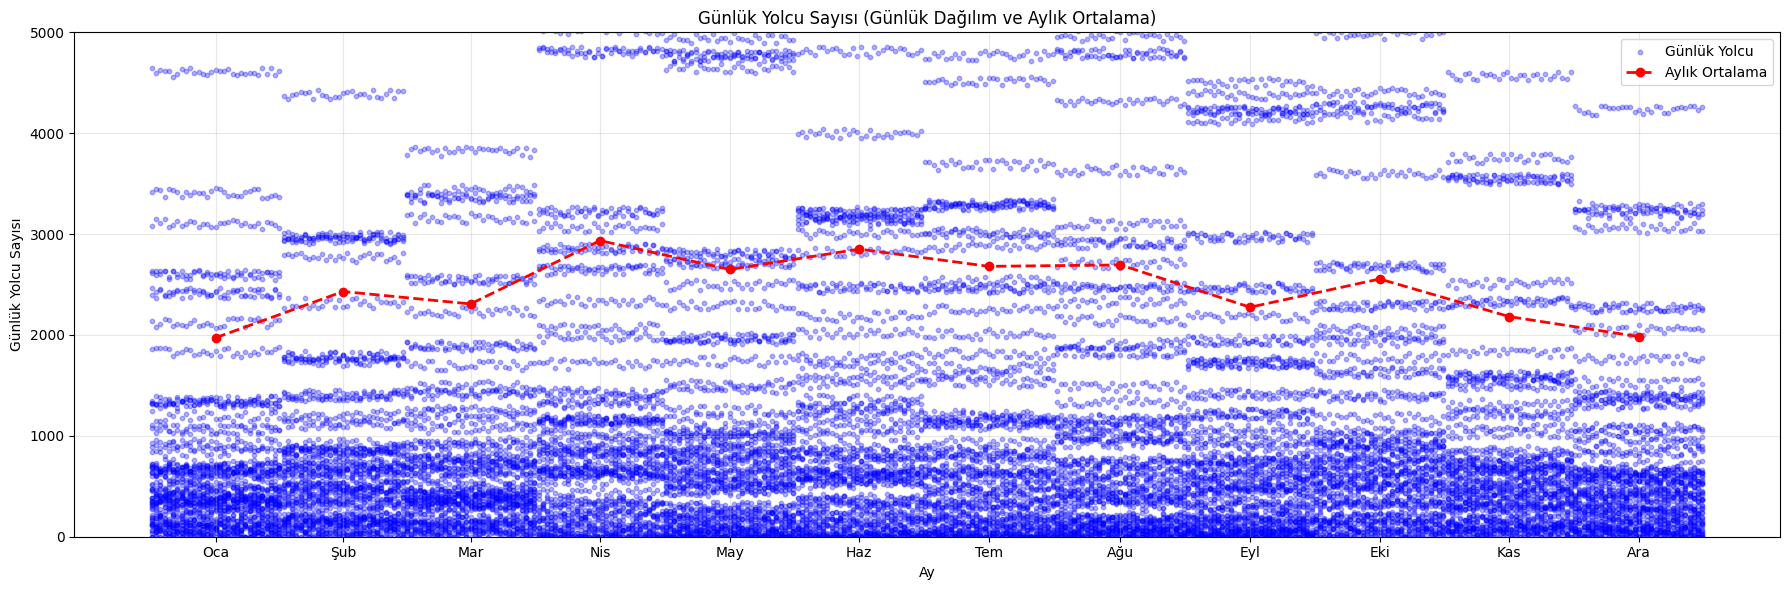

In [2]:

plt.figure(figsize=(18, 6))
plt.scatter(df["gun"], df["gunluk_yolcu"], alpha=0.3,
            s=10, color='blue', label="Günlük Yolcu")

monthly_avg = df.groupby("ay")["gunluk_yolcu"].mean()
ay_gun_sinir = df.groupby("ay")["gun"].mean()
plt.plot(ay_gun_sinir, monthly_avg, color='red', linestyle='--',
         linewidth=2, marker='o', label="Aylık Ortalama")

ay_isimleri = ["Oca", "Şub", "Mar", "Nis", "May",
               "Haz", "Tem", "Ağu", "Eyl", "Eki", "Kas", "Ara"]
ay_tickler = df.groupby("ay")["gun"].mean()

plt.xticks(ay_tickler, ay_isimleri)
plt.ylim(0, 5000)
plt.xlabel("Ay")
plt.ylabel("Günlük Yolcu Sayısı")
plt.title("Günlük Yolcu Sayısı (Günlük Dağılım ve Aylık Ortalama)")
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:

def get_season(month):
    if month in [12, 1, 2]:
        return "Kış"
    elif month in [3, 4, 5]:
        return "İlkbahar"
    elif month in [6, 7, 8]:
        return "Yaz"
    else:
        return "Sonbahar"

df["mevsim"] = df["ay"].apply(get_season)
mevsim_toplam = df.groupby("mevsim")["gunluk_yolcu"].sum().reindex(["Kış", "İlkbahar", "Yaz", "Sonbahar"])

plt.figure(figsize=(8, 8))
colors = sns.color_palette("pastel")
plt.pie(mevsim_toplam, labels=mevsim_toplam.index,
        autopct="%1.1f%%", colors=colors, startangle=90)
plt.title("Mevsimlere Göre Toplam Yolcu Dağılımı", fontsize=14)
plt.axis('equal')
plt.show()


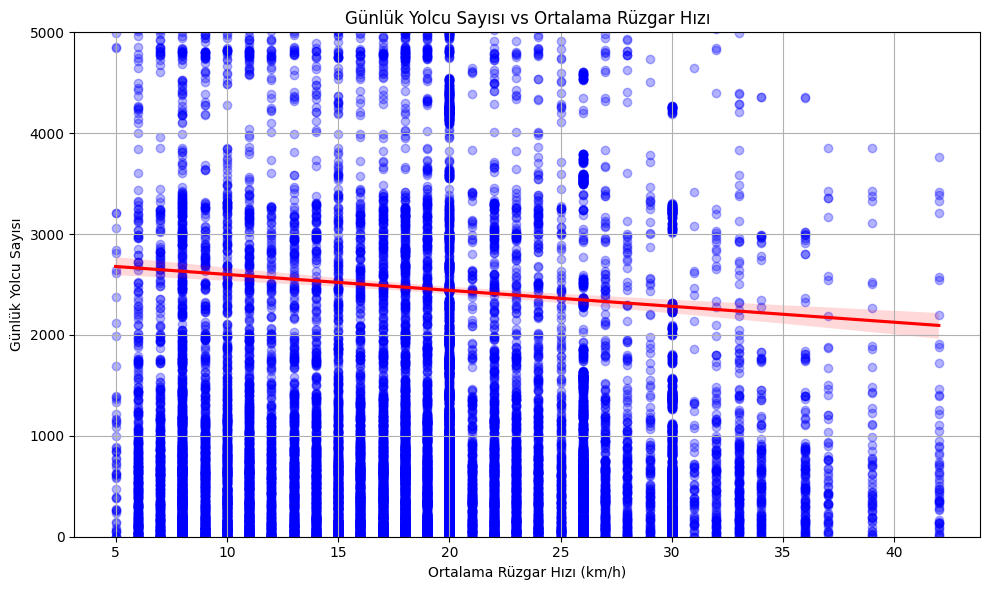

In [3]:

df_clean = df[["gunluk_yolcu", "ruzgar_hizi"]].dropna()
plt.figure(figsize=(10, 6))
sns.regplot(data=df_clean, x="ruzgar_hizi", y="gunluk_yolcu",
            scatter_kws={"alpha": 0.3, "color": "blue"},
            line_kws={"color": "red"})
plt.title("Günlük Yolcu Sayısı vs Ortalama Rüzgar Hızı")
plt.xlabel("Ortalama Rüzgar Hızı (km/h)")
plt.ylabel("Günlük Yolcu Sayısı")
plt.grid(True)
plt.ylim(0, 5000)
plt.tight_layout()
plt.show()


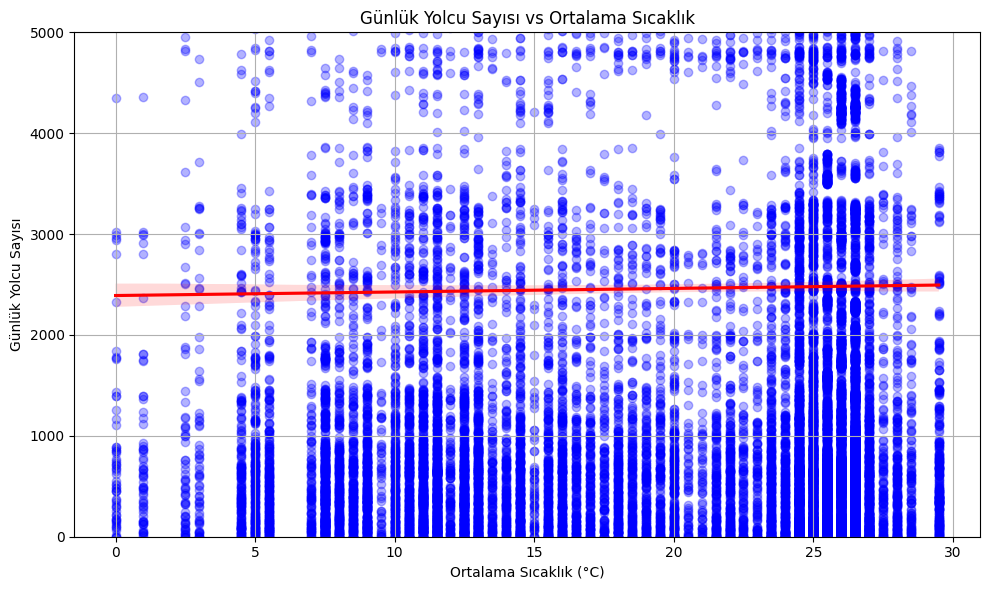

In [4]:

df["ortalama_sicaklik"] = (df["maksimum_sicaklik"] + df["minimum_sicaklik"]) / 2
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="ortalama_sicaklik", y="gunluk_yolcu",
            scatter_kws={"alpha": 0.3, "color": "blue"},
            line_kws={"color": "red"})
plt.title("Günlük Yolcu Sayısı vs Ortalama Sıcaklık")
plt.xlabel("Ortalama Sıcaklık (°C)")
plt.ylabel("Günlük Yolcu Sayısı")
plt.ylim(0, 5000)
plt.grid(True)
plt.tight_layout()
plt.show()


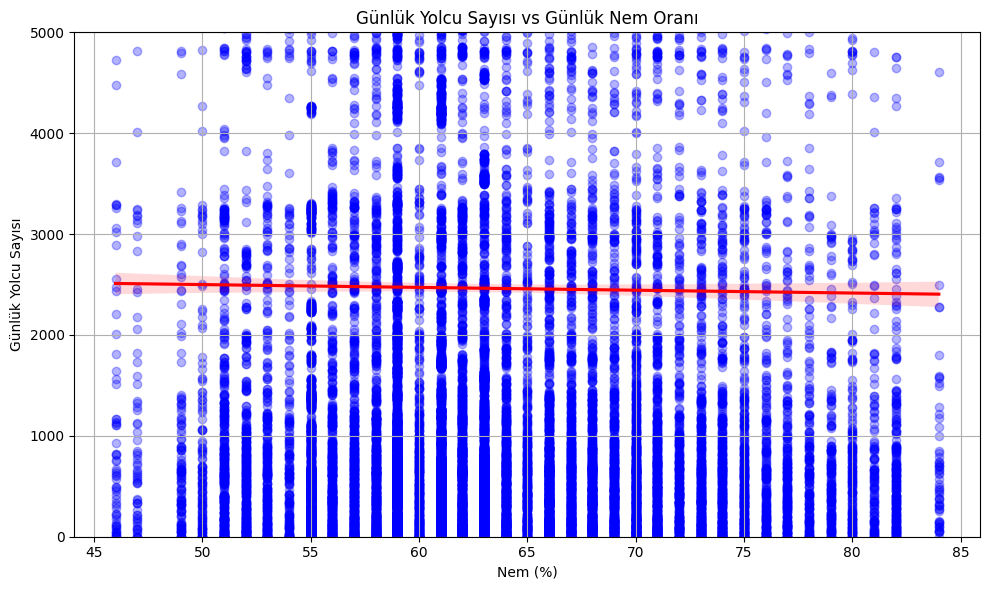

In [5]:

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="nem", y="gunluk_yolcu",
            scatter_kws={"alpha": 0.3, "color": "blue"},
            line_kws={"color": "red"})
plt.title("Günlük Yolcu Sayısı vs Günlük Nem Oranı")
plt.xlabel("Nem (%)")
plt.ylabel("Günlük Yolcu Sayısı")
plt.ylim(0, 5000)
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/wm/mhx3phdx7hxdwldjjhld7m9r0000gn/T/ipykernel_58116/3604773651.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x="donem", y="gunluk_yolcu", palette="pastel")


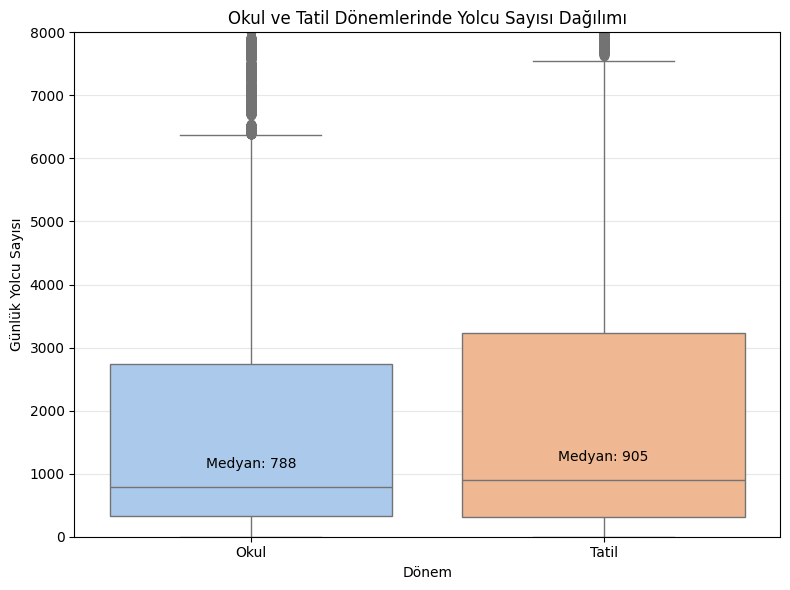

In [6]:

plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=df, x="donem", y="gunluk_yolcu", palette="pastel")
grouped = df.groupby("donem")["gunluk_yolcu"].median()
for i, median_val in enumerate(grouped):
    ax.text(i, median_val + 300, f"Medyan: {int(median_val)}", 
            horizontalalignment='center', color='black', fontsize=10)

plt.title("Okul ve Tatil Dönemlerinde Yolcu Sayısı Dağılımı")
plt.xlabel("Dönem")
plt.ylabel("Günlük Yolcu Sayısı")
plt.ylim(0, 8000)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


/var/folders/wm/mhx3phdx7hxdwldjjhld7m9r0000gn/T/ipykernel_58116/1217214798.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="donem", y="gunluk_yolcu", estimator="mean", palette="Set2")


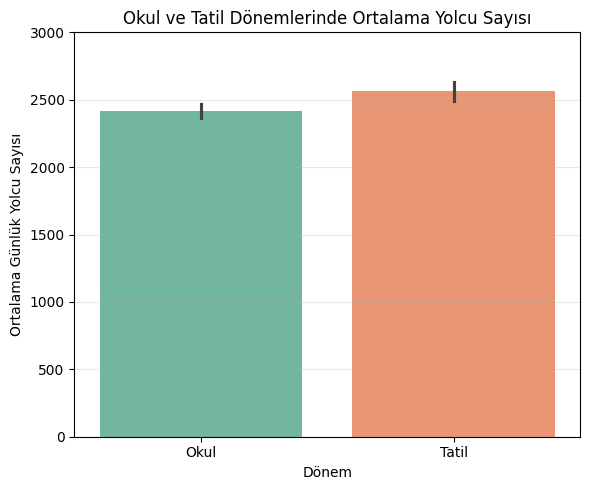

In [7]:

plt.figure(figsize=(6, 5))
sns.barplot(data=df, x="donem", y="gunluk_yolcu", estimator="mean", palette="Set2")
plt.title("Okul ve Tatil Dönemlerinde Ortalama Yolcu Sayısı")
plt.xlabel("Dönem")
plt.ylabel("Ortalama Günlük Yolcu Sayısı")
plt.ylim(0, 3000)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


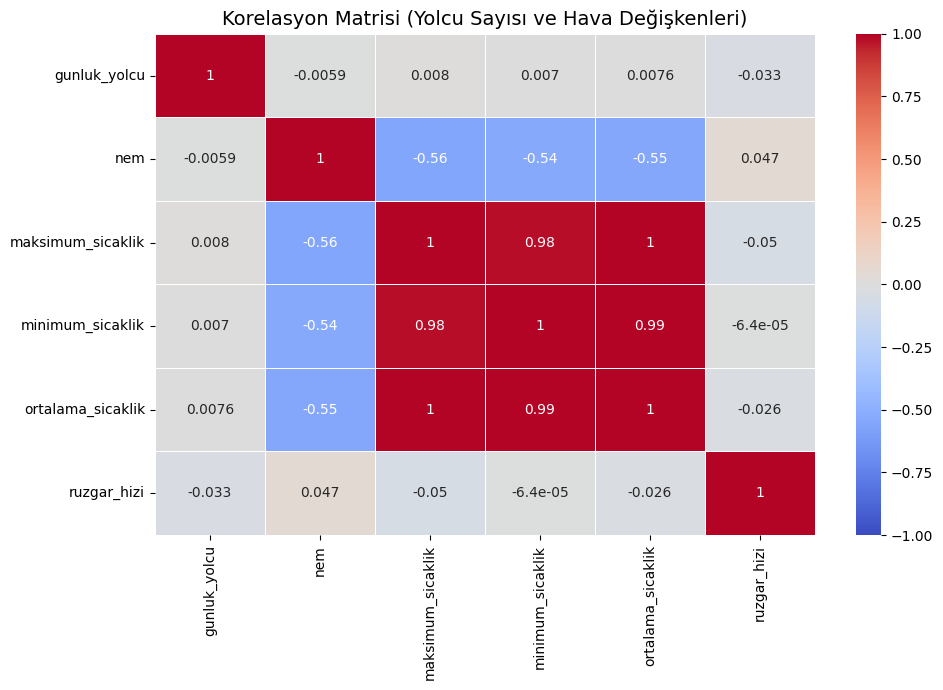

In [8]:

corr_cols = [
    "gunluk_yolcu",
    "nem",
    "maksimum_sicaklik",
    "minimum_sicaklik",
    "ortalama_sicaklik",
    "ruzgar_hizi"
]
corr_matrix = df[corr_cols].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Korelasyon Matrisi (Yolcu Sayısı ve Hava Değişkenleri)", fontsize=14)
plt.tight_layout()
plt.show()
